<a href="https://colab.research.google.com/github/hadwin-357/ML_models/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LDA (Linear Discriminant Analysis)
1. assume data has gaussian distribution

2. each data class has the same covariance matrix

3. relate to: Quadratic Discriminant Analysis, Regularized Discriminant Analysis,  Naive Baynes

In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
response= requests.get(url)
with open ('./irs.csv', 'wb') as f:
  f.write(response.content)


In [3]:
'''
This is the data
Sepal length in cm.
Sepal width in cm.
Petal length in cm.
Petal width in cm.
Class
'''
columns=['S_length','S_width','P_length','P_width','Class']
df= pd.read_csv('./irs.csv',names=columns)

df.sample(5, random_state=42)

,S_length,S_width,P_length,P_width,Class
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [5]:
#data preprocessing using sklearn
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X= df.iloc[:,0:4].values
y=df.iloc[:,4].values

sc = StandardScaler()
X = sc.fit_transform(X) # nornalization
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [9]:
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

lda = LinearDiscriminantAnalysis(n_components=2) # num of classess -1
X_train_transformed=lda.fit_transform(X_train, y_train) # fit then transform data
X_test_transformed=lda.transform(X_test)



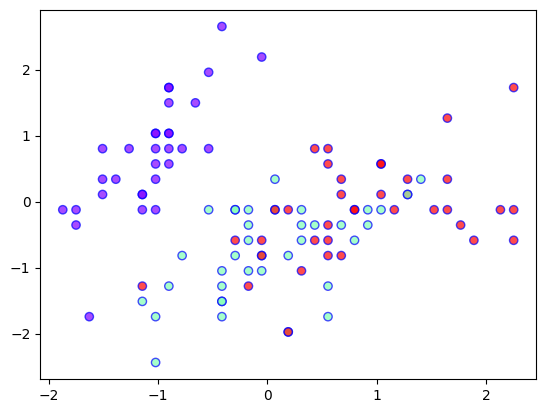

In [12]:
# plot the scatterplot
import matplotlib.pyplot as plt

plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

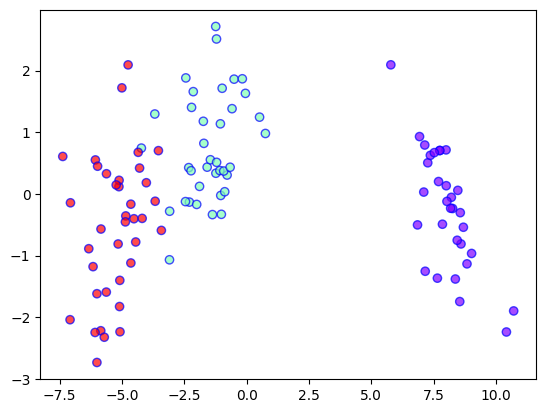

In [14]:
import matplotlib.pyplot as plt

plt.scatter(
    X_train_transformed[:,0],X_train_transformed[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [16]:
y_pred =lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'accuracy: {acc}')
con=confusion_matrix(y_test, y_pred)
print(con)

accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
